<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [3]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [5]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [6]:
K = len(set(train_dataset.targets))
print(K)

10


In [7]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [8]:
tmp_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True
)

for x, y in tmp_loader:
  print(x)
  print(y)
  break

tensor([[[[0.4627, 0.4275, 0.4627,  ..., 0.3608, 0.3255, 0.3961],
          [0.4588, 0.4667, 0.4784,  ..., 0.3412, 0.3020, 0.4118],
          [0.4353, 0.4196, 0.3843,  ..., 0.3412, 0.2549, 0.3569],
          ...,
          [0.4706, 0.4078, 0.4392,  ..., 0.3882, 0.3216, 0.3608],
          [0.4510, 0.4157, 0.4275,  ..., 0.3333, 0.2863, 0.3843],
          [0.5137, 0.5686, 0.5373,  ..., 0.3529, 0.2510, 0.3294]],

         [[0.3176, 0.3176, 0.3490,  ..., 0.2549, 0.2275, 0.2392],
          [0.3137, 0.3451, 0.3686,  ..., 0.2588, 0.2314, 0.2863],
          [0.2902, 0.2863, 0.2706,  ..., 0.2510, 0.2078, 0.2706],
          ...,
          [0.3412, 0.2824, 0.3255,  ..., 0.2627, 0.2314, 0.2392],
          [0.3490, 0.3294, 0.3294,  ..., 0.2196, 0.2157, 0.2863],
          [0.3961, 0.4824, 0.4275,  ..., 0.2392, 0.1882, 0.2510]],

         [[0.1216, 0.1490, 0.1804,  ..., 0.0863, 0.0824, 0.0588],
          [0.1294, 0.1804, 0.2000,  ..., 0.0980, 0.0980, 0.1255],
          [0.1176, 0.1216, 0.0980,  ..., 0

In [9]:
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    self.fc1 = nn.Linear(128*3*3, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128*3*3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [10]:
model = CNN(K)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()
      train_loss.append(loss.item())
    train_loss = np.mean(train_loss)
  
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0

    print(f"Epoch {it+1}/{epochs}, Train loss : {train_loss:.4f}, Test loss: {test_loss:.4f}, Duration: {dt}")

  return train_losses, test_losses

In [14]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train loss : 1.6937, Test loss: 1.4579, Duration: 0:00:06.800121
Epoch 2/15, Train loss : 1.3992, Test loss: 1.3430, Duration: 0:00:06.660578
Epoch 3/15, Train loss : 1.2731, Test loss: 1.2810, Duration: 0:00:06.669701
Epoch 4/15, Train loss : 1.1882, Test loss: 1.2047, Duration: 0:00:06.721153
Epoch 5/15, Train loss : 1.1239, Test loss: 1.1421, Duration: 0:00:06.728828
Epoch 6/15, Train loss : 1.0596, Test loss: 1.1087, Duration: 0:00:06.674220
Epoch 7/15, Train loss : 1.0089, Test loss: 1.0984, Duration: 0:00:06.684836
Epoch 8/15, Train loss : 0.9676, Test loss: 1.0417, Duration: 0:00:06.723206
Epoch 9/15, Train loss : 0.9243, Test loss: 1.0442, Duration: 0:00:06.646963
Epoch 10/15, Train loss : 0.8923, Test loss: 1.0816, Duration: 0:00:06.654106
Epoch 11/15, Train loss : 0.8586, Test loss: 1.0110, Duration: 0:00:06.688106
Epoch 12/15, Train loss : 0.8372, Test loss: 1.0399, Duration: 0:00:06.693220
Epoch 13/15, Train loss : 0.7979, Test loss: 1.0094, Duration: 0:00:06.66

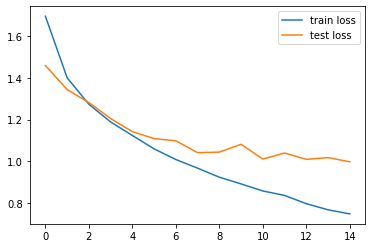

In [15]:
plt.plot(train_losses, label ="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [16]:
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  outputs = model(inputs)
  _, preds = torch.max(outputs, 1)
  n_correct += (preds == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  outputs = model(inputs)
  _, preds = torch.max(outputs, 1)
  n_correct += (preds == targets).sum().item()
  n_total += targets.shape[0]
test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.7518, Test acc: 0.6530
